In [1]:
# Import modules

import matplotlib.pyplot as plt
import os
from LaceyClass import LaceyMixingAnalyzer
from extrapolation import extrapolation
import numpy as np


simulations = {
    "1": os.path.abspath(os.path.join("..", '..', 'data', "rot_drum", "JKR_periodic_clean", "Rot_drum.dem")),
    "2": os.path.abspath(os.path.join("..", '..', "Rot_drum", "HM_10rpm_100k", "Rot_drum.dem"))

}    
# Initialise variables and call class
simulation = simulations["2"]
sim_path = os.path.dirname(simulation)

#simulation parameters
start_t = 1
end_t = 20
domain_x = (-0.07, 0.07)       
domain_y = (-0.025, 0.025)
domain_z = (-0.07, 0.07)
num_bins = 4
direction = "y"

extrap = extrapolation(start_t, end_t, simulation, domain_x, domain_y, domain_z, num_bins, direction)

In [2]:
kinetic_energies, peak_times, peak_index, highlight_y = extrap.kin_energies(0.0002, 5)


Analysing Kinetic Energies...


(-0.0021, -0.0015)

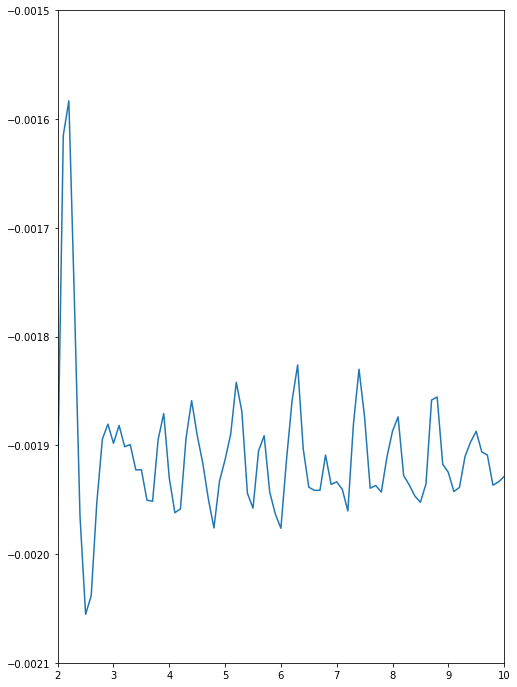

In [3]:
plt.figure(figsize=(8,12))
kin_e = np.column_stack((extrap.deck.timestepValues[extrap.start:], kinetic_energies))
plt.plot(kin_e[:,0], kin_e[:,1])

plt.scatter(peak_times, highlight_y, c="red")
x = (2,10)

plt.xlim(left=x[0], right=x[1])
plt.ylim(bottom=-0.0021, top=-0.0015)

In [4]:
extrap.find_nearest(extrap.deck.timestepValues, 4)

40

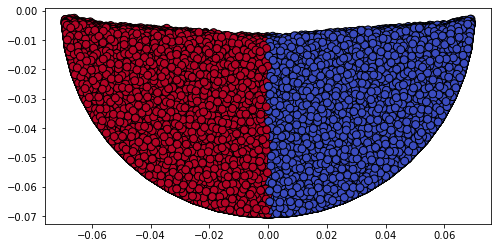

In [5]:
# Plot starting position

id_dict = extrap.id_dictionary(extrap.sim_time[0])
init_particles = extrap.get_particle_coords(extrap.sim_time[0])
plt.figure(figsize=(8,12))
extrap.plot_particles(init_particles, id_dict, True)
plt.show()

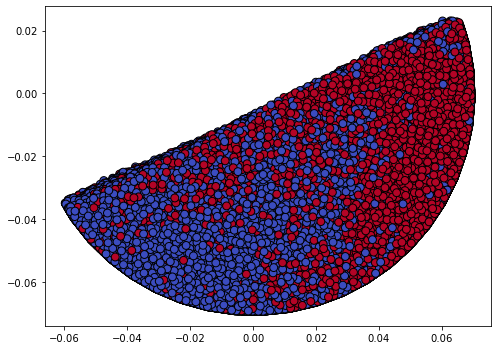

In [13]:
# Plot peak index 3 normal

plt.figure(figsize=(8,12))
actual_3 = extrap.plot_particles(extrap.get_particle_coords(200), id_dict, True)

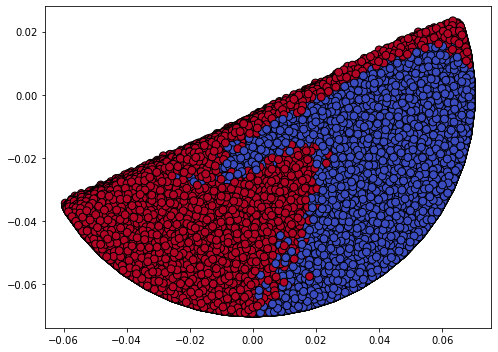

In [7]:
pos_dict_split = extrap.import_dict(sim_path, "peak_10y_split")
plt.figure(figsize=(8,12))
ex_3 = extrap.plot_particles(extrap.extrapolate_particles(extrap.get_particle_coords(40), pos_dict_split), id_dict, 1)

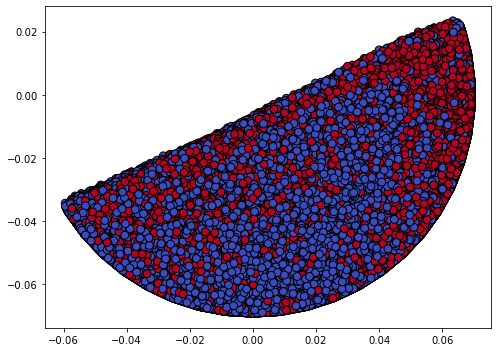

In [14]:
predicted_old = extrap.plot_particles(extrap.get_particle_coords(40), id_dict, 0)
extrapolated_lacey = []
init_time = 40
extrapolated_time = [init_time]
limit = 32


for i in range(limit):
    if i == limit-1:
        plt.figure(figsize=(8,12))
        predicted_new = extrap.plot_particles(extrap.extrapolate_particles(predicted_old, pos_dict_split), id_dict, 1)
        plt.show()
    else:
        predicted_new = extrap.plot_particles(extrap.extrapolate_particles(predicted_old, pos_dict_split), id_dict, 0)
        # mass_1, mass_2, conc = lacey.bining(b_coords, div_size, predicted_new, cut_off)

        # Lacey_index = lacey.Lacey(mass_1, mass_2, conc, cut_off, len(predicted_new))
        # extrapolated_lacey.append(Lacey_index)
        # new_time = extrapolated_time[-1]+0.8
        # extrapolated_time.append(new_time)
        # #print(Lacey_index, new_time)
        predicted_old = predicted_new

In [9]:
predicted_new[0,:]

array([ 6.07427111e-02, -2.42504718e-02, -6.36732462e-03,  4.41786467e-06,
        1.42690000e+04,  0.00000000e+00])